# Install dgl package and import other packages

In [ ]:
# import below files

#1 Wear4PDmoveOnto_v2.owl
#2 output.csv
#3 output_modified.csv

In [ ]:
!pip install dgl==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 18.4 MB/s eta 0:00:00


In [ ]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn.pytorch import GATConv

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


# Read features from Ontology Wear4PDmove

In [ ]:
# Read data only for pd-patient-101
import rdflib
import pandas as pd

# Load the OWL file
g = rdflib.Graph()
g.parse("Wear4PDmoveOnto_v2.owl")

# Define the RDF namespaces used in the file
owl = rdflib.Namespace("http://www.w3.org/2002/07/owl#")
rdf = rdflib.Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
xsd = rdflib.Namespace("http://www.w3.org/2001/XMLSchema#")

# Define the subject URI for the observation
subject_uri = rdflib.URIRef("http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-101")

# Extract the value of ageOfPatient
age_of_patient = None
for s, p, o in g.triples((subject_uri, None, None)):
    if p == rdflib.URIRef("http://w3id.org/Wear4PDmove/onto#ageOfPatient"):
        age_of_patient = o.value

# Create a DataFrame with the extracted information
df = pd.DataFrame({"Property": ["ageOfPatient"], "Value": [age_of_patient]})

# Print the DataFrame
print(df)

# Save the DataFrame as a CSV file
df.to_csv("output.csv", sep=',', index=False)

       Property  Value
0  ageOfPatient     10


In [ ]:
# Read data for one pd-patient
import rdflib
import pandas as pd

# Load the OWL file
g = rdflib.Graph()
g.parse("Wear4PDmoveOnto_v2.owl")

# Define the RDF namespaces used in the file
owl = rdflib.Namespace("http://www.w3.org/2002/07/owl#")
rdf = rdflib.Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
xsd = rdflib.Namespace("http://www.w3.org/2001/XMLSchema#")

# Define the subject URI for the observation
subject_uri = rdflib.URIRef("http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-101")

# Define the properties of interest
properties = {
    "ageOfPatient": xsd.integer,
    "bodyMassIndex": xsd.decimal,
    "diseaseDuration": xsd.integer,
    "hasAkinesia": xsd.boolean,
    "hasAnxiety": xsd.boolean,
    "hasBradykinisiaOfUpperLimp": xsd.boolean,
    "hasDepression": xsd.boolean,
    "hasDysphagia": xsd.boolean,
    "hasFatigue": xsd.boolean,
    "hasFreezingOfGait": xsd.boolean,
    "hasPosturalInstability": xsd.boolean,
    "hasRigidity": xsd.boolean,
    "hasSleepDisturbances": xsd.boolean,
    "hasTremor": xsd.boolean,
    "heartRate": xsd.decimal,
    "levelHoehnYahrStage": xsd.integer,
    "obsAfterDosing": xsd.boolean,
    "scoreUPDRS": xsd.decimal
}

# Extract the property values
data = {}
for prop, datatype in properties.items():
    value = None
    for s, p, o in g.triples((subject_uri, None, None)):
        if p == rdflib.URIRef(f"http://w3id.org/Wear4PDmove/onto#{prop}"):
            if isinstance(o, rdflib.Literal) and o.datatype == datatype:
                value = o.value
                break
    data[prop] = value

# Create a DataFrame with the extracted information
df = pd.DataFrame(data, index=[0])

# Print the DataFrame
print(df)

df.to_csv("output.csv", sep=',', index=False)

   ageOfPatient bodyMassIndex  diseaseDuration  hasAkinesia  hasAnxiety  \
0            10          12.9               11         True        True   

   hasBradykinisiaOfUpperLimp  hasDepression  hasDysphagia  hasFatigue  \
0                       False          False         False        True   

   hasFreezingOfGait  hasPosturalInstability  hasRigidity  \
0              False                    True        False   

   hasSleepDisturbances  hasTremor heartRate  levelHoehnYahrStage  \
0                 False      False      12.8                   12   

   obsAfterDosing scoreUPDRS  
0            True       12.5  


# Read from ontology and save in csv and added two more fields (1st way)

In [ ]:
# Read data from all pd-patient-observations (preferred - final script)
import rdflib
import pandas as pd

# Load the OWL file
g = rdflib.Graph()
g.parse("Wear4PDmoveOnto_v2.owl")

# Define the RDF namespaces used in the file
namespace = rdflib.Namespace("http://w3id.org/Wear4PDmove/onto#")
xsd = rdflib.Namespace("http://www.w3.org/2001/XMLSchema#")

# Define the properties of interest
properties = {
    "ageOfPatient": xsd.integer,
    "bodyMassIndex": xsd.decimal,
    "diseaseDuration": xsd.integer,
    "hasAkinesia": xsd.boolean,
    "hasAnxiety": xsd.boolean,
    "hasBradykinisiaOfUpperLimp": xsd.boolean,
    "hasDepression": xsd.boolean,
    "hasDysphagia": xsd.boolean,
    "hasFatigue": xsd.boolean,
    "hasFreezingOfGait": xsd.boolean,
    "hasPosturalInstability": xsd.boolean,
    "hasRigidity": xsd.boolean,
    "hasSleepDisturbances": xsd.boolean,
    "hasTremor": xsd.boolean,
    "heartRate": xsd.decimal,
    "levelHoehnYahrStage": xsd.integer,
    "obsAfterDosing": xsd.boolean,
    "scoreUPDRS": xsd.decimal
}

# Create a list to store patient data
patient_data_list = []

# Define the patient observation numbers
patient_numbers = [101, 102, 103, 201, 202, 203, 301, 302, 303]  # Add more as needed

for patient_number in patient_numbers:
    patient_uri = namespace[f"PD-patient-Observation-{patient_number}"]
    patient_data = {"patientURI": patient_uri}

    for prop, datatype in properties.items():
        value = None
        for s, p, o in g.triples((patient_uri, None, None)):
            if p == namespace[prop]:
                if isinstance(o, rdflib.Literal) and o.datatype == datatype:
                    value = o.value
                    break
        patient_data[prop] = value

    patient_data_list.append(patient_data)

# Create a DataFrame with the collected patient data
df = pd.DataFrame(patient_data_list)

# Print the DataFrame
print(df)

# Save the DataFrame to a CSV file
df.to_csv("output.csv", sep=',', index=False)

                                          patientURI  ageOfPatient  \
0  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
1  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
2  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
3  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
4  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
5  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
6  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
7  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   
8  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...            10   

  bodyMassIndex  diseaseDuration  hasAkinesia  hasAnxiety  \
0          12.9               11         True        True   
1          12.9               11         True        True   
2          12.9               11         True        True   
3          12.9               11         True        Tr

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('output.csv')

# Drop the 'patientURI' column
df = df.drop('patientURI', axis=1, errors='ignore')

# Convert boolean columns to int (False -> 0, True -> 1)
bool_columns = df.select_dtypes(include=bool).columns
df[bool_columns] = df[bool_columns].astype(int)

# Save the modified DataFrame to a new CSV file
df.to_csv('output_modified.csv', index=False)

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('output.csv')

# Drop the 'patientURI' column
df = df.drop('patientURI', axis=1, errors='ignore')

# Convert boolean columns to int (False -> 0, True -> 1)
bool_columns = df.select_dtypes(include=bool).columns
df[bool_columns] = df[bool_columns].astype(int)

# Add new fields based on conditions
df['send_notification_medium_alert'] = (df['hasBradykinisiaOfUpperLimp'] | df['hasTremor']).astype(int)
df['send_notification_high_alert'] = (df['hasBradykinisiaOfUpperLimp'] & df['hasTremor']).astype(int)

# Save the modified DataFrame to a new CSV file
df.to_csv('output_modified.csv', index=False)

# Generate random values for obs (2nd way)

In [ ]:
import random
import csv

# Generate random values for 9 obs
random_values = []
for _ in range(9):
    age = random.randint(1, 100)
    body_mass_index = round(random.uniform(10.0, 30.0), 1)
    disease_duration = random.randint(1, 20)
    has_akinesia = int(random.choice([True, False]))
    has_anxiety = int(random.choice([True, False]))
    has_bradykinisia_of_upper_limp = int(random.choice([True, False]))
    has_depression = int(random.choice([True, False]))
    has_dysphagia = int(random.choice([True, False]))
    has_fatigue = int(random.choice([True, False]))
    has_freezing_of_gait = int(random.choice([True, False]))
    has_postural_instability = int(random.choice([True, False]))
    has_rigidity = int(random.choice([True, False]))
    has_sleep_disturbances = int(random.choice([True, False]))
    has_tremor = int(random.choice([True, False]))
    heart_rate = round(random.uniform(10.0, 20.0), 1)
    level_hoehn_yahr_stage = random.randint(10, 20)
    obs_after_dosing = int(random.choice([True, False]))
    score_updrs = round(random.uniform(10.0, 20.0), 1)

    send_notification_medium_alert = int((has_bradykinisia_of_upper_limp or has_tremor) and not (has_bradykinisia_of_upper_limp and has_tremor))
    send_notification_high_alert = int(has_bradykinisia_of_upper_limp and has_tremor)

    patient_values = [
        age, body_mass_index, disease_duration, has_akinesia, has_anxiety,
        has_bradykinisia_of_upper_limp, has_depression, has_dysphagia, has_fatigue,
        has_freezing_of_gait, has_postural_instability, has_rigidity,
        has_sleep_disturbances, has_tremor, heart_rate, level_hoehn_yahr_stage,
        obs_after_dosing, score_updrs,
        send_notification_medium_alert, send_notification_high_alert
    ]

    random_values.append(patient_values)

# Save the random values to a CSV file
filename = 'random_values_with_alerts.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow([
        'age', 'bodyMassIndex', 'diseaseDuration', 'hasAkinesia', 'hasAnxiety',
        'hasBradykinisiaOfUpperLimp', 'hasDepression', 'hasDysphagia', 'hasFatigue',
        'hasFreezingOfGait', 'hasPosturalInstability', 'hasRigidity',
        'hasSleepDisturbances', 'hasTremor', 'heartRate', 'levelHoehnYahrStage',
        'obsAfterDosing', 'scoreUPDRS',
        'send_notification_medium_alert', 'send_notification_high_alert'
    ])
    writer.writerows(random_values)

print(f"Random values for 9 patients with alerts have been saved in '{filename}'.")

Random values for 9 patients with alerts have been saved in 'random_values_with_alerts.csv'.


# Final Test

In [ ]:
import dgl
import torch
import pandas as pd
import numpy as np
import dgl.function as fn
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GATConv

# Load data from CSV file
data = pd.read_csv('output_modified.csv')

# Convert data to DGLGraph
g = dgl.DGLGraph()
g.add_nodes(data.shape[0])
for feature in data.columns:
    g.ndata[feature] = torch.tensor(data[feature].values)

src = []
dst = []
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        if i != j:
            src.append(i)
            dst.append(j)

g.add_edges(src, dst)

# Define the GAT model
class GAT(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_heads):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_feats, hidden_feats, num_heads)
        self.conv2 = GATConv(hidden_feats * num_heads, out_feats, 1)

    def forward(self, g, x):
        x = F.elu(self.conv1(g, x).flatten(1))
        x = self.conv2(g, x).mean(1)
        return x

# Train the GAT model for send_notification_medium_alert
model_medium_alert = GAT(in_feats=data.shape[1], hidden_feats=4, out_feats=2, num_heads=2)
optimizer_medium_alert = torch.optim.Adam(model_medium_alert.parameters(), lr=0.01)
criterion_medium_alert = nn.CrossEntropyLoss()

num_epochs = 500
for epoch in range(num_epochs):
    logits_medium_alert = model_medium_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
    loss_medium_alert = criterion_medium_alert(logits_medium_alert, g.ndata['send_notification_medium_alert'].long())
    optimizer_medium_alert.zero_grad()
    loss_medium_alert.backward()
    optimizer_medium_alert.step()
    if (epoch + 1) % 100 == 0:
        print(f'Medium Alert - Epoch {epoch+1}, loss: {loss_medium_alert.item():.4f}')

# Train the GAT model for send_notification_high_alert
model_high_alert = GAT(in_feats=data.shape[1], hidden_feats=4, out_feats=2, num_heads=2)
optimizer_high_alert = torch.optim.Adam(model_high_alert.parameters(), lr=0.01)
criterion_high_alert = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    logits_high_alert = model_medium_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
    loss_high_alert = criterion_high_alert(logits_high_alert, g.ndata['send_notification_high_alert'].long())
    optimizer_high_alert.zero_grad()
    loss_high_alert.backward()
    optimizer_high_alert.step()
    if (epoch + 1) % 100 == 0:
        print(f'High Alert - Epoch {epoch+1}, loss: {loss_high_alert.item():.4f}')

# Test the GAT models
logits_medium_alert = model_medium_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
pred_medium_alert = np.argmax(logits_medium_alert.detach().numpy(), axis=1)
accuracy_medium_alert = (pred_medium_alert == g.ndata['send_notification_medium_alert'].numpy()).mean()
print(f'Medium Alert - Accuracy: {accuracy_medium_alert:.4f}')

logits_high_alert = model_medium_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
pred_high_alert = np.argmax(logits_high_alert.detach().numpy(), axis=1)
accuracy_high_alert = (pred_high_alert == g.ndata['send_notification_high_alert'].numpy()).mean()
print(f'High Alert - Accuracy: {accuracy_high_alert:.4f}')


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


/usr/local/lib/python3.10/dist-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(
/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Medium Alert - Epoch 100, loss: 0.5303
Medium Alert - Epoch 200, loss: 0.5291
Medium Alert - Epoch 300, loss: 0.5180
Medium Alert - Epoch 400, loss: 0.2620
Medium Alert - Epoch 500, loss: 0.0579
High Alert - Epoch 100, loss: 0.0571
High Alert - Epoch 200, loss: 0.0571
High Alert - Epoch 300, loss: 0.0571
High Alert - Epoch 400, loss: 0.0571
High Alert - Epoch 500, loss: 0.0571
Medium Alert - Accuracy: 1.0000
High Alert - Accuracy: 1.0000


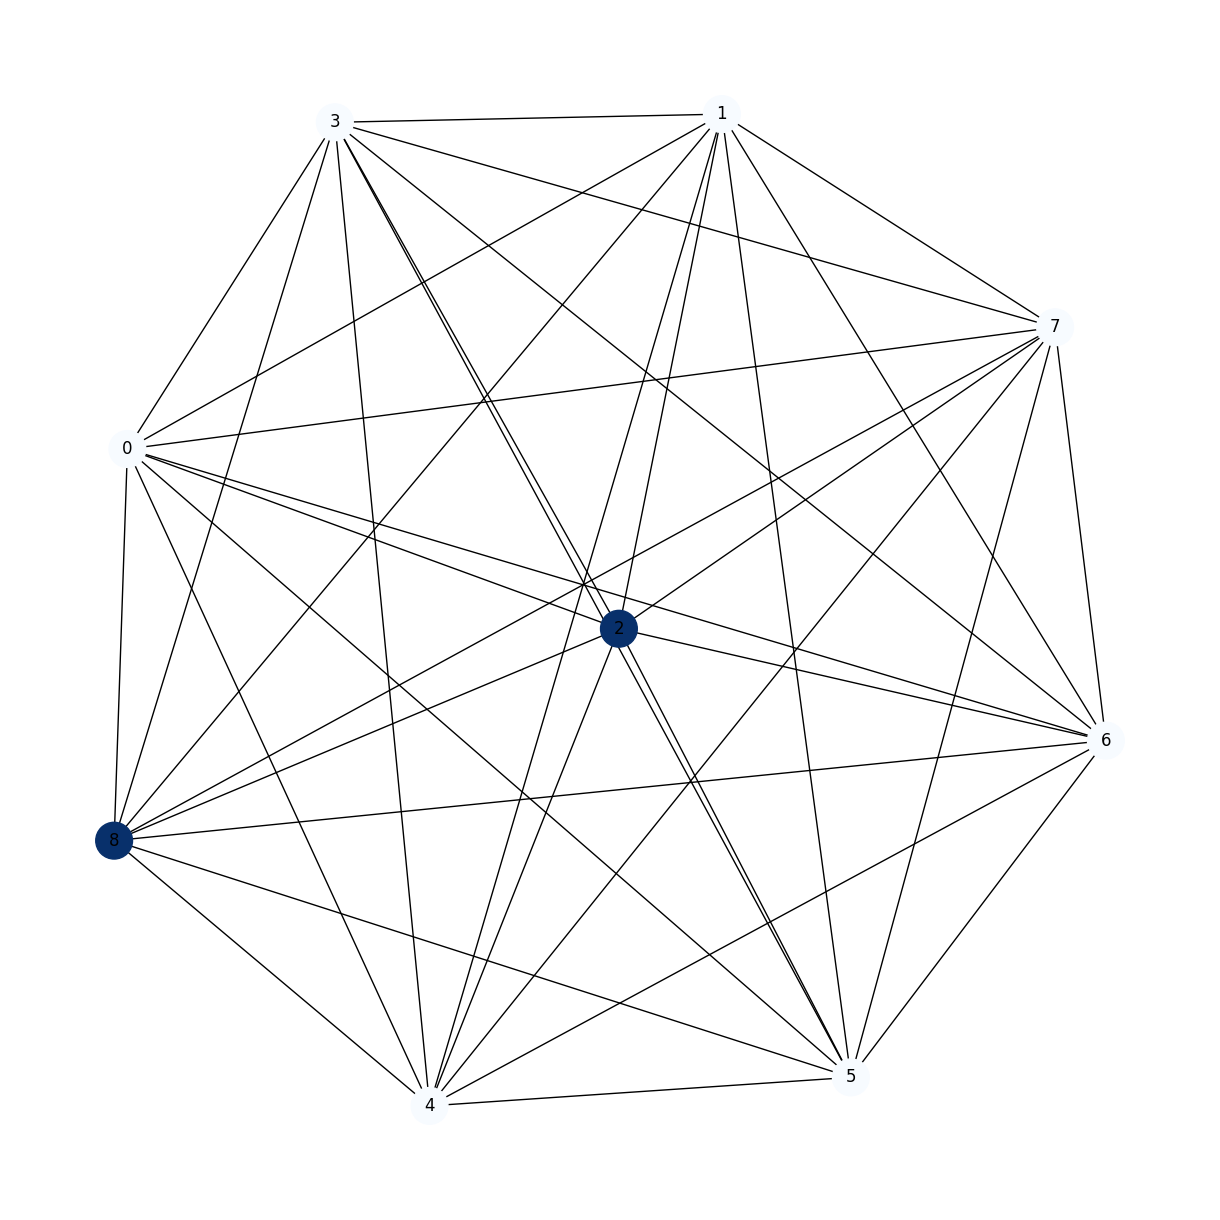

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import torch
from dgl.nn import GATConv

# Visualization function with adjusted sampling
def visualize_gnn(graph, node_feature, attention_weights=None, max_nodes_to_visualize=50):
    # Convert DGLGraph to NetworkX graph for visualization
    nx_graph = graph.to_networkx().to_undirected()

    # Determine the number of nodes to visualize
    num_nodes = min(max_nodes_to_visualize, graph.number_of_nodes())

    # Sample a subset of nodes for visualization
    all_nodes = list(nx_graph.nodes)
    sampled_nodes = np.random.choice(all_nodes, num_nodes, replace=False)
    subgraph = nx_graph.subgraph(sampled_nodes)

    # Node feature for color coding
    node_colors = [graph.ndata[node_feature][i].item() for i in sampled_nodes]

    # Edge weights (attention) for edge thickness
    if attention_weights is not None:
        edge_weights = [attention_weights[i, j].item() for i, j in subgraph.edges()]
    else:
        edge_weights = 1  # Default thickness

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(subgraph, with_labels=True, node_color=node_colors, width=edge_weights,
            node_size=700, cmap=plt.cm.Blues)
    plt.show()

# Call the function with a specific node feature, e.g., 'send_notification_medium_alert'
visualize_gnn(g, 'send_notification_medium_alert')


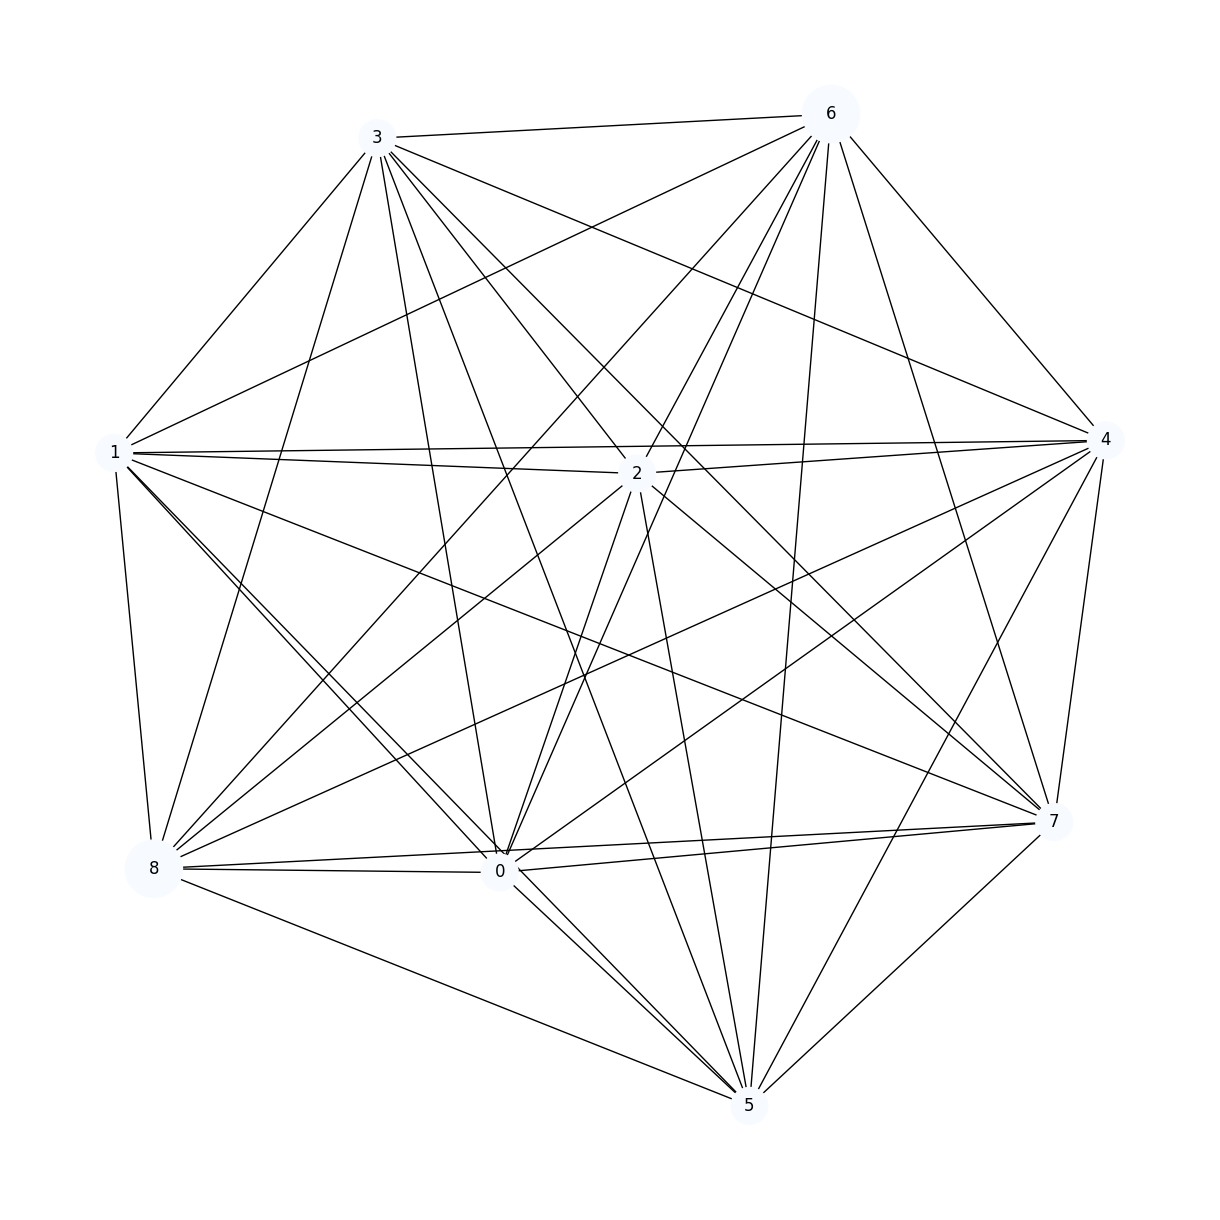

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import torch
from dgl.nn import GATConv

# Visualization function for multiple features
def visualize_gnn(graph, color_feature, size_feature, max_nodes_to_visualize=50):
    # Convert DGLGraph to NetworkX graph for visualization
    nx_graph = graph.to_networkx().to_undirected()

    # Determine the number of nodes to visualize
    num_nodes = min(max_nodes_to_visualize, graph.number_of_nodes())

    # Sample a subset of nodes for visualization
    all_nodes = list(nx_graph.nodes)
    sampled_nodes = np.random.choice(all_nodes, num_nodes, replace=False)
    subgraph = nx_graph.subgraph(sampled_nodes)

    # Node color feature
    node_colors = [graph.ndata[color_feature][i].item() for i in sampled_nodes]

    # Node size feature
    node_sizes = [graph.ndata[size_feature][i].item() for i in sampled_nodes]
    # Normalize node sizes for better visualization
    node_sizes = 700 + 1000 * (node_sizes - np.min(node_sizes)) / (np.max(node_sizes) - np.min(node_sizes))

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(subgraph, with_labels=True, node_color=node_colors, node_size=node_sizes,
            cmap=plt.cm.Blues)
    plt.show()

# Call the function with two different node features, e.g., 'bodyMassIndex' and 'send_notification_medium_alert'
visualize_gnn(g, 'bodyMassIndex', 'send_notification_medium_alert')


In [ ]:
import dgl
import torch
import pandas as pd
import numpy as np
import dgl.function as fn
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GATConv
from sklearn.metrics import precision_score, recall_score, f1_score

# Load data from CSV file
data = pd.read_csv('output_modified.csv')

# Convert data to DGLGraph
g = dgl.DGLGraph()
g.add_nodes(data.shape[0])

# Add all features to the graph
for feature in data.columns:
    g.ndata[feature] = torch.tensor(data[feature].values)

# Add edges to the graph
src = []
dst = []
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        if i != j:
            src.append(i)
            dst.append(j)

g.add_edges(src, dst)

# Define the GAT model
class GAT(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_heads):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_feats, hidden_feats, num_heads)
        self.conv2 = GATConv(hidden_feats * num_heads, out_feats, 1)

    def forward(self, g, x):
        x = F.elu(self.conv1(g, x).flatten(1))
        x = self.conv2(g, x).mean(1)
        return x

# Hidden layer sizes to test
hidden_layer_sizes = [4, 8, 16]

# Train and test GAT models for send_notification_medium_alert
for hidden_feats in hidden_layer_sizes:
    model_medium_alert = GAT(in_feats=data.shape[1], hidden_feats=hidden_feats, out_feats=2, num_heads=2)
    optimizer_medium_alert = torch.optim.Adam(model_medium_alert.parameters(), lr=0.01)
    criterion_medium_alert = nn.CrossEntropyLoss()

    num_epochs = 500
    for epoch in range(num_epochs):
        logits_medium_alert = model_medium_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
        loss_medium_alert = criterion_medium_alert(logits_medium_alert, g.ndata['send_notification_medium_alert'].long())
        optimizer_medium_alert.zero_grad()
        loss_medium_alert.backward()
        optimizer_medium_alert.step()
        if (epoch + 1) % 100 == 0:
            print(f'Medium Alert - Hidden Features {hidden_feats} - Epoch {epoch+1}, loss: {loss_medium_alert.item():.4f}')

    # Test the GAT model
    logits_medium_alert = model_medium_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
    pred_medium_alert = np.argmax(logits_medium_alert.detach().numpy(), axis=1)
    ground_truth_medium_alert = g.ndata['send_notification_medium_alert'].numpy()

    accuracy_medium_alert = (pred_medium_alert == ground_truth_medium_alert).mean()
    precision_medium_alert = precision_score(ground_truth_medium_alert, pred_medium_alert)
    recall_medium_alert = recall_score(ground_truth_medium_alert, pred_medium_alert)
    f1_medium_alert = f1_score(ground_truth_medium_alert, pred_medium_alert)

    print(f'Medium Alert - Hidden Features {hidden_feats} - Accuracy: {accuracy_medium_alert:.4f}')
    print(f'Medium Alert - Hidden Features {hidden_feats} - Precision: {precision_medium_alert:.4f}')
    print(f'Medium Alert - Hidden Features {hidden_feats} - Recall: {recall_medium_alert:.4f}')
    print(f'Medium Alert - Hidden Features {hidden_feats} - F1-Score: {f1_medium_alert:.4f}\n')

# Train and test GAT models for send_notification_high_alert
for hidden_feats in hidden_layer_sizes:
    model_high_alert = GAT(in_feats=data.shape[1], hidden_feats=hidden_feats, out_feats=2, num_heads=2)
    optimizer_high_alert = torch.optim.Adam(model_high_alert.parameters(), lr=0.01)
    criterion_high_alert = nn.CrossEntropyLoss()

    num_epochs = 500
    for epoch in range(num_epochs):
        logits_high_alert = model_high_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
        loss_high_alert = criterion_high_alert(logits_high_alert, g.ndata['send_notification_high_alert'].long())
        optimizer_high_alert.zero_grad()
        loss_high_alert.backward()
        optimizer_high_alert.step()
        if (epoch + 1) % 100 == 0:
            print(f'High Alert - Hidden Features {hidden_feats} - Epoch {epoch+1}, loss: {loss_high_alert.item():.4f}')

    # Test the GAT model
    logits_high_alert = model_high_alert(g, torch.tensor(data[data.columns].values, dtype=torch.float32))
    pred_high_alert = np.argmax(logits_high_alert.detach().numpy(), axis=1)
    ground_truth_high_alert = g.ndata['send_notification_high_alert'].numpy()

    accuracy_high_alert = (pred_high_alert == ground_truth_high_alert).mean()
    precision_high_alert = precision_score(ground_truth_high_alert, pred_high_alert)
    recall_high_alert = recall_score(ground_truth_high_alert, pred_high_alert)
    f1_high_alert = f1_score(ground_truth_high_alert, pred_high_alert)

    print(f'High Alert - Hidden Features {hidden_feats} - Accuracy: {accuracy_high_alert:.4f}')
    print(f'High Alert - Hidden Features {hidden_feats} - Precision: {precision_high_alert:.4f}')
    print(f'High Alert - Hidden Features {hidden_feats} - Recall: {recall_high_alert:.4f}')
    print(f'High Alert - Hidden Features {hidden_feats} - F1-Score: {f1_high_alert:.4f}\n')


/usr/local/lib/python3.10/dist-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


Medium Alert - Hidden Features 4 - Epoch 100, loss: 0.5322
Medium Alert - Hidden Features 4 - Epoch 200, loss: 0.5287
Medium Alert - Hidden Features 4 - Epoch 300, loss: 0.5026
Medium Alert - Hidden Features 4 - Epoch 400, loss: 0.4691
Medium Alert - Hidden Features 4 - Epoch 500, loss: 0.4220
Medium Alert - Hidden Features 4 - Accuracy: 0.7778
Medium Alert - Hidden Features 4 - Precision: 0.0000
Medium Alert - Hidden Features 4 - Recall: 0.0000
Medium Alert - Hidden Features 4 - F1-Score: 0.0000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Medium Alert - Hidden Features 8 - Epoch 100, loss: 0.5191
Medium Alert - Hidden Features 8 - Epoch 200, loss: 0.5046
Medium Alert - Hidden Features 8 - Epoch 300, loss: 0.3671
Medium Alert - Hidden Features 8 - Epoch 400, loss: 0.2766
Medium Alert - Hidden Features 8 - Epoch 500, loss: 0.2308
Medium Alert - Hidden Features 8 - Accuracy: 1.0000
Medium Alert - Hidden Features 8 - Precision: 1.0000
Medium Alert - Hidden Features 8 - Recall: 1.0000
Medium Alert - Hidden Features 8 - F1-Score: 1.0000

Medium Alert - Hidden Features 16 - Epoch 100, loss: 0.5295
Medium Alert - Hidden Features 16 - Epoch 200, loss: 0.5262
Medium Alert - Hidden Features 16 - Epoch 300, loss: 0.5186
Medium Alert - Hidden Features 16 - Epoch 400, loss: 0.4880
Medium Alert - Hidden Features 16 - Epoch 500, loss: 0.3793
Medium Alert - Hidden Features 16 - Accuracy: 0.7778
Medium Alert - Hidden Features 16 - Precision: 0.0000
Medium Alert - Hidden Features 16 - Recall: 0.0000
Medium Alert - Hidden Features 16 - F1-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


High Alert - Hidden Features 4 - Epoch 100, loss: 0.5246
High Alert - Hidden Features 4 - Epoch 200, loss: 0.5071
High Alert - Hidden Features 4 - Epoch 300, loss: 0.4216
High Alert - Hidden Features 4 - Epoch 400, loss: 0.3125
High Alert - Hidden Features 4 - Epoch 500, loss: 0.2121
High Alert - Hidden Features 4 - Accuracy: 0.7778
High Alert - Hidden Features 4 - Precision: 0.0000
High Alert - Hidden Features 4 - Recall: 0.0000
High Alert - Hidden Features 4 - F1-Score: 0.0000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


High Alert - Hidden Features 8 - Epoch 100, loss: 0.5263
High Alert - Hidden Features 8 - Epoch 200, loss: 0.5187
High Alert - Hidden Features 8 - Epoch 300, loss: 0.3247
High Alert - Hidden Features 8 - Epoch 400, loss: 0.1232
High Alert - Hidden Features 8 - Epoch 500, loss: 0.0329
High Alert - Hidden Features 8 - Accuracy: 1.0000
High Alert - Hidden Features 8 - Precision: 1.0000
High Alert - Hidden Features 8 - Recall: 1.0000
High Alert - Hidden Features 8 - F1-Score: 1.0000

High Alert - Hidden Features 16 - Epoch 100, loss: 0.5314
High Alert - Hidden Features 16 - Epoch 200, loss: 0.5253
High Alert - Hidden Features 16 - Epoch 300, loss: 0.4958
High Alert - Hidden Features 16 - Epoch 400, loss: 0.4016
High Alert - Hidden Features 16 - Epoch 500, loss: 0.4560
High Alert - Hidden Features 16 - Accuracy: 1.0000
High Alert - Hidden Features 16 - Precision: 1.0000
High Alert - Hidden Features 16 - Recall: 1.0000
High Alert - Hidden Features 16 - F1-Score: 1.0000



# TODO Visualization Graph

In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00


In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
# visualize ontology (preferred - final script)
import pyvis.network as net
from rdflib import Graph

# Load the RDF graph from a file or URL
g = Graph().parse("Wear4PDmoveOnto_v2.owl")

# Create a Pyvis network object with 'in_line' cdn_resources setting
netw = net.Network(width="100%", height="800px", notebook=True, cdn_resources='in_line')

# Add nodes and edges to the network object
for s, p, o in g:
    netw.add_node(str(s), title=str(s))
    netw.add_node(str(o), title=str(o))
    netw.add_edge(str(s), str(o))

# Show the network
netw.show("ontology.html")

# Open the HTML file in a web browser
import webbrowser
webbrowser.open_new_tab("ontology.html")


ontology.html


False

# Viualize GNN (specific implementation for GCN) with plotly

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load CSV data
df = pd.read_csv('output_modified.csv')

# Assuming a fully connected graph for simplicity
nodes = torch.arange(df.shape[0])
edge_index = torch.cartesian_prod(nodes, nodes).t()
edge_index = edge_index[:, edge_index[0] != edge_index[1]]  # Remove self-loops

# Select features for GCN input
features = df[['ageOfPatient', 'bodyMassIndex', 'heartRate', 'hasTremor', 'hasBradykinisiaOfUpperLimp']]
labels = df.apply(lambda row: 2 if row['hasTremor'] and row['hasBradykinisiaOfUpperLimp']
                  else 1 if row['hasTremor'] or row['hasBradykinisiaOfUpperLimp']
                  else 0, axis=1)
x = torch.tensor(features.values, dtype=torch.float)
y = torch.tensor(labels.values, dtype=torch.long)

# Create masks for data splits
num_nodes = df.shape[0]
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Example: 80% train, 10% val, 10% test
num_train = int(num_nodes * 0.8)
num_val = int(num_nodes * 0.1)

train_mask[:num_train] = True
val_mask[num_train:num_train + num_val] = True
test_mask[num_train + num_val:] = True

# Create Data object
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

class GCNNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNNet, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate model, optimizer, and loss function
model = GCNNet(in_channels=5, hidden_channels=16, out_channels=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

for epoch in range(200):
    loss = train()
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}')


Epoch: 1, Loss: 9.3673
Epoch: 2, Loss: 8.1872
Epoch: 3, Loss: 8.5215
Epoch: 4, Loss: 4.4119
Epoch: 5, Loss: 1.7853
Epoch: 6, Loss: 3.6437
Epoch: 7, Loss: 1.0989
Epoch: 8, Loss: 2.3685
Epoch: 9, Loss: 0.7582
Epoch: 10, Loss: 0.8685
Epoch: 11, Loss: 0.8499
Epoch: 12, Loss: 0.6937
Epoch: 13, Loss: 0.6296
Epoch: 14, Loss: 1.8511
Epoch: 15, Loss: 2.0683
Epoch: 16, Loss: 0.8043
Epoch: 17, Loss: 3.4073
Epoch: 18, Loss: 1.2333
Epoch: 19, Loss: 1.5496
Epoch: 20, Loss: 1.8532
Epoch: 21, Loss: 1.8178
Epoch: 22, Loss: 0.6947
Epoch: 23, Loss: 1.4411
Epoch: 24, Loss: 0.8218
Epoch: 25, Loss: 1.1722
Epoch: 26, Loss: 1.4706
Epoch: 27, Loss: 2.1681
Epoch: 28, Loss: 1.0211
Epoch: 29, Loss: 0.8561
Epoch: 30, Loss: 0.9944
Epoch: 31, Loss: 0.6733
Epoch: 32, Loss: 0.8139
Epoch: 33, Loss: 0.8334
Epoch: 34, Loss: 1.0149
Epoch: 35, Loss: 0.6198
Epoch: 36, Loss: 0.7549
Epoch: 37, Loss: 1.2162
Epoch: 38, Loss: 0.9195
Epoch: 39, Loss: 0.6072
Epoch: 40, Loss: 0.5991
Epoch: 41, Loss: 0.7272
Epoch: 42, Loss: 0.6087
E

In [ ]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load CSV data
df = pd.read_csv('output_modified.csv')

# Assuming a fully connected graph for simplicity
nodes = torch.arange(df.shape[0])
edge_index = torch.cartesian_prod(nodes, nodes).t()
edge_index = edge_index[:, edge_index[0] != edge_index[1]]  # Remove self-loops

# Select features for GCN input
features = df[['ageOfPatient', 'bodyMassIndex', 'heartRate', 'hasTremor', 'hasBradykinisiaOfUpperLimp']]
labels = df.apply(lambda row: 2 if row['hasTremor'] and row['hasBradykinisiaOfUpperLimp']
                  else 1 if row['hasTremor'] or row['hasBradykinisiaOfUpperLimp']
                  else 0, axis=1)
x = torch.tensor(features.values, dtype=torch.float)
y = torch.tensor(labels.values, dtype=torch.long)

# Create masks for data splits
num_nodes = df.shape[0]
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Example: 80% train, 10% val, 10% test
num_train = int(num_nodes * 0.8)
num_val = int(num_nodes * 0.1)

train_mask[:num_train] = True
val_mask[num_train:num_train + num_val] = True
test_mask[num_train + num_val:] = True

# Create Data object
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

class GCNNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNNet, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate model, optimizer, and loss function
model = GCNNet(in_channels=5, hidden_channels=16, out_channels=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

for epoch in range(200):
    loss = train()
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}')


In [ ]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


class GCNNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNNet, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Load CSV data
df = pd.read_csv('output_modified.csv')

# Assuming a fully connected graph for simplicity
nodes = torch.arange(df.shape[0])
edge_index = torch.cartesian_prod(nodes, nodes).t()
edge_index = edge_index[:, edge_index[0] != edge_index[1]]  # Remove self-loops

# Select features for GCN input
features = df[['ageOfPatient', 'bodyMassIndex', 'heartRate', 'hasTremor', 'hasBradykinisiaOfUpperLimp']]
labels = df.apply(lambda row: 2 if row['hasTremor'] and row['hasBradykinisiaOfUpperLimp']
                  else 1 if row['hasTremor'] or row['hasBradykinisiaOfUpperLimp']
                  else 0, axis=1)
x = torch.tensor(features.values, dtype=torch.float)
y = torch.tensor(labels.values, dtype=torch.long)

# Create masks for data splits
num_nodes = df.shape[0]
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Example: 80% train, 10% val, 10% test
num_train = int(num_nodes * 0.8)
num_val = int(num_nodes * 0.1)

train_mask[:num_train] = True
val_mask[num_train:num_train + num_val] = True
test_mask[num_train + num_val:] = True

# Create Data object
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

# Define hidden channels values
hidden_channels_values = [16, 32]

for hidden_channels in hidden_channels_values:
    model = GCNNet(in_channels=5, hidden_channels=hidden_channels, out_channels=3)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(100):
        loss = train(model, data, optimizer, criterion)
        print(f'Hidden Channels: {hidden_channels}, Epoch: {epoch + 1}, Loss: {loss:.4f}')

    # Evaluate the model here if needed
    # Evaluate the model
    model.eval()
    output = model(data)
    predictions = output.argmax(dim=1)  # Get the class with the highest probability

    # Use only the test_mask to evaluate performance
    test_predictions = predictions[data.test_mask].numpy()
    test_ground_truth = data.y[data.test_mask].numpy()

    # Classification metrics
    accuracy = accuracy_score(test_ground_truth, test_predictions)
    precision = precision_score(test_ground_truth, test_predictions, average='weighted')
    recall = recall_score(test_ground_truth, test_predictions, average='weighted')
    f1 = f1_score(test_ground_truth, test_predictions, average='weighted')

    print(f'Hidden Channels: {hidden_channels}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')


Hidden Channels: 16, Epoch: 1, Loss: 13.9206
Hidden Channels: 16, Epoch: 2, Loss: 9.7906
Hidden Channels: 16, Epoch: 3, Loss: 9.2058
Hidden Channels: 16, Epoch: 4, Loss: 11.6591
Hidden Channels: 16, Epoch: 5, Loss: 3.7009
Hidden Channels: 16, Epoch: 6, Loss: 3.4339
Hidden Channels: 16, Epoch: 7, Loss: 1.8180
Hidden Channels: 16, Epoch: 8, Loss: 5.0739
Hidden Channels: 16, Epoch: 9, Loss: 3.1824
Hidden Channels: 16, Epoch: 10, Loss: 1.0799
Hidden Channels: 16, Epoch: 11, Loss: 2.3527
Hidden Channels: 16, Epoch: 12, Loss: 0.8314
Hidden Channels: 16, Epoch: 13, Loss: 1.8148
Hidden Channels: 16, Epoch: 14, Loss: 1.2825
Hidden Channels: 16, Epoch: 15, Loss: 1.0405
Hidden Channels: 16, Epoch: 16, Loss: 1.9394
Hidden Channels: 16, Epoch: 17, Loss: 0.6317
Hidden Channels: 16, Epoch: 18, Loss: 1.7997
Hidden Channels: 16, Epoch: 19, Loss: 0.5996
Hidden Channels: 16, Epoch: 20, Loss: 0.9298
Hidden Channels: 16, Epoch: 21, Loss: 2.9772
Hidden Channels: 16, Epoch: 22, Loss: 0.7056
Hidden Channels: 

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objs as go



class GCNNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNNet, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Load CSV data
df = pd.read_csv('output_modified.csv')

# Assuming a fully connected graph for simplicity
nodes = torch.arange(df.shape[0])
edge_index = torch.cartesian_prod(nodes, nodes).t()
edge_index = edge_index[:, edge_index[0] != edge_index[1]]  # Remove self-loops

# Select features for GCN input
features = df[['ageOfPatient', 'bodyMassIndex', 'heartRate', 'hasTremor', 'hasBradykinisiaOfUpperLimp']]
labels = df.apply(lambda row: 2 if row['hasTremor'] and row['hasBradykinisiaOfUpperLimp']
                  else 1 if row['hasTremor'] or row['hasBradykinisiaOfUpperLimp']
                  else 0, axis=1)
x = torch.tensor(features.values, dtype=torch.float)
y = torch.tensor(labels.values, dtype=torch.long)

# Create masks for data splits
num_nodes = df.shape[0]
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Example: 80% train, 10% val, 10% test
num_train = int(num_nodes * 0.8)
num_val = int(num_nodes * 0.1)

train_mask[:num_train] = True
val_mask[num_train:num_train + num_val] = True
test_mask[num_train + num_val:] = True

# Create Data object
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

# Define hidden channels values
hidden_channels_values = [16, 32]

for hidden_channels in hidden_channels_values:
    model = GCNNet(in_channels=5, hidden_channels=hidden_channels, out_channels=3)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(100):
        loss = train(model, data, optimizer, criterion)
        print(f'Hidden Channels: {hidden_channels}, Epoch: {epoch + 1}, Loss: {loss:.4f}')

    # Evaluate the model here if needed
    # Select the model with the desired number of hidden channels for visualization
    model.eval()
    embeddings = model(data).detach()  # This gets the output embeddings

    # Create a NetworkX graph
    G = nx.Graph()
    edge_list = edge_index.t().numpy().tolist()
    G.add_edges_from(edge_list)

    # Generate positions for each node (using a layout algorithm like spring layout)
    pos = nx.spring_layout(G)

    # Create edge traces for plotly
    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])

    # Create node traces for plotly
    # For node colors, use a feature like the first dimension of embeddings
    node_x = [pos[node][0] for node in G.nodes()]
    node_y = [pos[node][1] for node in G.nodes()]
    node_color = embeddings[:, 0]  # Adjust based on what you want to visualize

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=10,
            color=node_color.numpy(),
            line_width=2))

    # Create figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='Graph visualization with GCN embeddings',
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=0),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

    fig.show()


Hidden Channels: 16, Epoch: 1, Loss: 2.6924
Hidden Channels: 16, Epoch: 2, Loss: 3.3631
Hidden Channels: 16, Epoch: 3, Loss: 1.5371
Hidden Channels: 16, Epoch: 4, Loss: 2.8563
Hidden Channels: 16, Epoch: 5, Loss: 1.5316
Hidden Channels: 16, Epoch: 6, Loss: 2.0685
Hidden Channels: 16, Epoch: 7, Loss: 1.7658
Hidden Channels: 16, Epoch: 8, Loss: 1.9722
Hidden Channels: 16, Epoch: 9, Loss: 1.0014
Hidden Channels: 16, Epoch: 10, Loss: 1.3507
Hidden Channels: 16, Epoch: 11, Loss: 1.1123
Hidden Channels: 16, Epoch: 12, Loss: 0.6669
Hidden Channels: 16, Epoch: 13, Loss: 0.9577
Hidden Channels: 16, Epoch: 14, Loss: 0.6015
Hidden Channels: 16, Epoch: 15, Loss: 0.6024
Hidden Channels: 16, Epoch: 16, Loss: 0.6041
Hidden Channels: 16, Epoch: 17, Loss: 0.7503
Hidden Channels: 16, Epoch: 18, Loss: 0.8274
Hidden Channels: 16, Epoch: 19, Loss: 1.1997
Hidden Channels: 16, Epoch: 20, Loss: 1.4158
Hidden Channels: 16, Epoch: 21, Loss: 0.8431
Hidden Channels: 16, Epoch: 22, Loss: 0.8418
Hidden Channels: 16

Hidden Channels: 32, Epoch: 1, Loss: 10.5347
Hidden Channels: 32, Epoch: 2, Loss: 11.0179
Hidden Channels: 32, Epoch: 3, Loss: 4.0639
Hidden Channels: 32, Epoch: 4, Loss: 2.9009
Hidden Channels: 32, Epoch: 5, Loss: 4.4126
Hidden Channels: 32, Epoch: 6, Loss: 0.9023
Hidden Channels: 32, Epoch: 7, Loss: 1.3436
Hidden Channels: 32, Epoch: 8, Loss: 1.9928
Hidden Channels: 32, Epoch: 9, Loss: 1.5165
Hidden Channels: 32, Epoch: 10, Loss: 3.0051
Hidden Channels: 32, Epoch: 11, Loss: 2.7040
Hidden Channels: 32, Epoch: 12, Loss: 0.9436
Hidden Channels: 32, Epoch: 13, Loss: 2.1327
Hidden Channels: 32, Epoch: 14, Loss: 2.8616
Hidden Channels: 32, Epoch: 15, Loss: 1.8752
Hidden Channels: 32, Epoch: 16, Loss: 1.7633
Hidden Channels: 32, Epoch: 17, Loss: 2.2619
Hidden Channels: 32, Epoch: 18, Loss: 2.5631
Hidden Channels: 32, Epoch: 19, Loss: 1.6292
Hidden Channels: 32, Epoch: 20, Loss: 0.6130
Hidden Channels: 32, Epoch: 21, Loss: 0.9554
Hidden Channels: 32, Epoch: 22, Loss: 0.6178
Hidden Channels: 